In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Leer el archivo y convertirlo a un np array


In [3]:
df = pd.read_csv('kc_house_data.csv')
df.insert(loc=0,column='ones',value=1)
df.head(5)

,ones,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,1,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,1,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df1 = df[['ones','sqft_living','price']]
df1.head()

,ones,sqft_living,price
0,1,1180,221900.0
1,1,2570,538000.0
2,1,770,180000.0
3,1,1960,604000.0
4,1,1680,510000.0


In [5]:
newdf = df1.sample(frac=1)
newdf.head()

,ones,sqft_living,price
3,1,1960,604000.0
6235,1,4260,994000.0
17055,1,2710,630000.0
11069,1,710,299000.0
15852,1,1780,395000.0


In [6]:
arr=np.array(newdf)
arr

array([[1.00000e+00, 1.96000e+03, 6.04000e+05],
       [1.00000e+00, 4.26000e+03, 9.94000e+05],
       [1.00000e+00, 2.71000e+03, 6.30000e+05],
       ...,
       [1.00000e+00, 3.03000e+03, 8.37219e+05],
       [1.00000e+00, 1.06000e+03, 4.03504e+05],
       [1.00000e+00, 1.58000e+03, 2.53000e+05]])

División de la data en 75% de entrenamiento, 15 % para cv y 15% para testing

In [7]:
train, cv, test = np.split(arr, [int(len(arr)*0.7), int(len(arr)*0.85)])

In [10]:

x_train = train[:,0:2]
y_train = train[:,2].reshape(len(x_train),1)
x_cv = cv[:,0:2]
y_cv = cv[:,2].reshape(len(x_cv),1)
x_test = test[:,0:2]
y_test = test[:,2].reshape(len(x_test),1)

### Descenso del gradiente



In [11]:
def linear_function_cost(X, y, theta):
    h = X @ theta
    return ((y - h) ** 2).sum() / (2 * len(X))

def linear_gradient_cost(X, y, theta):
    h = X @ theta
    return (X.T @ (h - y)) / len(X)

def gradient_descent_cost(X, y, theta_0, linear_function, linear_gradient, learning_rate=0.0000001, threshold= 2, max_iter=1000):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(linear_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - learning_rate * linear_gradient(X, y, theta)
        costs.append(linear_function(X, y, theta))
        thetas.append(theta.copy())
    return theta, costs, thetas

In [12]:
m,n = x_train.shape
rand_theta = np.random.rand(n,1)
rand_theta

array([[0.17087272],
       [0.46573034]])

### Polinomio grado 1

In [13]:

theta_results1, costs1, thetas1 = gradient_descent_cost(x_train, y_train, rand_theta, linear_function_cost, linear_gradient_cost)

<function matplotlib.pyplot.show(close=None, block=None)>

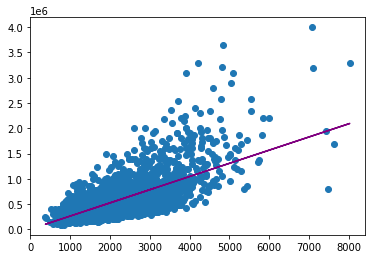

In [15]:
plt.scatter(x_cv[:,1], y_cv)
plt.plot(x_cv[:,1],x_cv @ theta_results1, color='purple')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

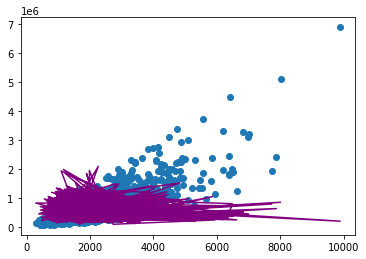

In [16]:
plt.scatter(x_test[:,1], y_test)
plt.plot(x_test[:,1],x_cv @ theta_results1, color='purple')
plt.show

### Polinomio grado 2

In [17]:

pol2 = (x_train[:,1]**2).reshape(len(x_train),1)
xtrain2 = np.append(x_train, pol2, axis=1)
pol2 = (x_cv[:,1]**2).reshape(len(x_cv),1)
xcv2 = np.append(x_cv, pol2, axis=1)
pol2 = (x_test[:,1]**2).reshape(len(x_test),1)
xtest2 = np.append(x_cv, pol2, axis=1)

In [18]:
rand_theta2=np.random.rand(3,1)
rand_theta2

array([[0.11203697],
       [0.59464645],
       [0.02563988]])

In [20]:

theta_results2, costs2, thetas2 = gradient_descent_cost(xtrain2, y_train, rand_theta2, linear_function_cost, linear_gradient_cost, learning_rate=0.00000000000000001, threshold=0.01, max_iter=3000)
theta_results2

array([[0.11203698],
       [0.59466338],
       [0.06533251]])

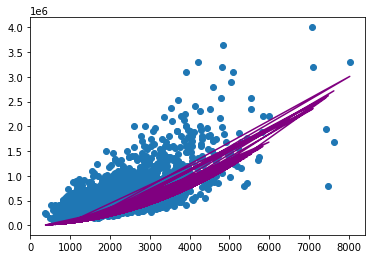

In [22]:

plt.scatter(xcv2[:, 1], y_cv)
plt.plot(xcv2[:, 1], xcv2 @ thetas2[1000], color='purple')
plt.show()

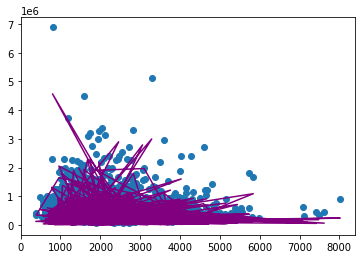

In [23]:

plt.scatter(xtest2[:, 1], y_test)
plt.plot(xtest2[:, 1], xtest2 @ thetas2[1000], color='purple')
plt.show()

### Conclusiones

Podemos ver que agregar otro polinimio al modelo no lo mejora, por eso
concluyo que un modelo de regresión lineal es el más apropiado para describir el modelo
Podemos comparar los coeficientes de la regresion lineal con la de polinomio 2
y vemos como se hacen más pequenos, esto se traduce a que cada vez son menos significaticos
y ya no será necesario analizarlo con un polinomio más alto